In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [37]:
Input_1 = np.random.normal(3, 0.5, 150).reshape(-1,1)
Output_1 = np.random.normal(0, 0.5, 150).reshape(-1,1)
Data_set_1 = pd.DataFrame(np.concatenate((Input_1, Output_1), axis=1), columns=['x','y'])
Data_set_1['label'] = -1

Input_2 = np.random.normal(0, 0.2, 30).reshape(-1,1)
Output_2 = np.random.normal(1, 0.5, 30).reshape(-1,1)
Data_set_2 = pd.DataFrame(np.concatenate((Input_2, Output_2), axis=1), columns=['x','y'])
Data_set_2['label'] = 1

Data_set = pd.concat([Data_set_1,Data_set_2], axis = 0)

In [38]:
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       180 non-null    float64
 1   y       180 non-null    float64
 2   label   180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB


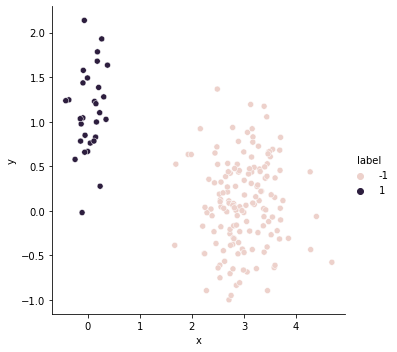

In [39]:
sns.relplot(x="x", y="y", hue="label", data=Data_set);

As you can see, these 2 categories are linearly separable.

In [40]:
class AdaLine_Neural_Network() :
    
    def __init__(self, input_features, output_features, seed = 50) :
        #Seed
        np.random.seed(seed)

        self.input_features = input_features
        self.output_features = output_features
        self.init_wa()
        
    def init_waa(self) :
        self.weights = np.random.uniform(low=-1, high=1, size=(input_features*output_features,)).reshape(output_features,-1)
        self.biases = np.random.uniform(low=-1, high=1, size=(output_features,))
        
        self.Learning_Rate = 0.01
        
    def Positive(self,num) :
        if num >= 0 :
            return 1
        else :
            return -1
    def forward(self, x) :
        sum = np.matmul(self.weights,x)+self.biases
        Prediction_result = pd.Series(np.matmul(self.weights,x)+self.biases)
        Prediction_result = prediction.apply(self.Positive).values
        return Prediction_result,sum
    
    def backward(self,t, sum, x) :
        self.weights = self.weights + self.Learning_Rate*(t-sum)*x
        self.biases = self.biases + self.Learnig_Rate*(t-sum)
        
    def train(self,data,epochs = 1) :
        error = []
        for epoch in range(0,epochs):
            error.append(self.evaluate(Data_set))
            
            for index, row in Data_set.iterrows():
                # Forward Propagation
                prediction,sum = self.forward(row[['x','y']].values)
                # Backpropagation
                self.backward(row['label'],sum,row[['x','y']].values)
        
        return error
                
    def calc_error(self,target,sum) :
        return (np.square(target-sum)/2)
    
    def evaluate(self,data) :
        error = 0
        for index, row in data.iterrows():
            #Forward Propagation
            target_1,sum = self.forward(row[['x','y']].values)
            error += model.calc_error(target_1,sum)[0]
        
        return error
    
    def predict(self,data) :
        result = []
        for index, row in data.iterrows() :
            target,sum =  self.forward(row[['x','y']].values)
            result.append(target[0])
        
        return result
            

In [45]:
input_features = 2
output_features = 1
model = AdaLineNetwork(input_features, output_features)
print(model.weights)
print(model.biases)

[[-0.25091976  0.90142861]]
[0.46398788]


In [49]:
epochs_ = 10
loss_per_epoch = model.train(Data_set, epochs = epochs_)

In [50]:
loss_per_epoch

[33.401611129654775,
 9.219800265458987,
 9.279040512273058,
 9.286955611821503,
 9.273361142892956,
 9.253556207731549,
 9.233595771034,
 9.215507538225268,
 9.199759603525509,
 9.186266655664008]

In [51]:
print(model.weights)
print(model.biases)

[[-0.46022624  0.23791553]]
[0.58551396]


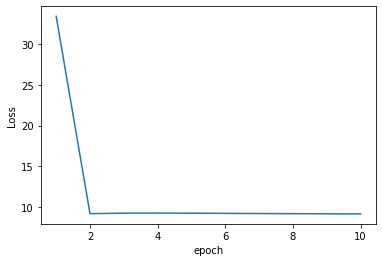

In [52]:
plt.plot(range(1,epochs_+1), loss_per_epoch)
plt.ylabel('Loss');
plt.xlabel('epoch');

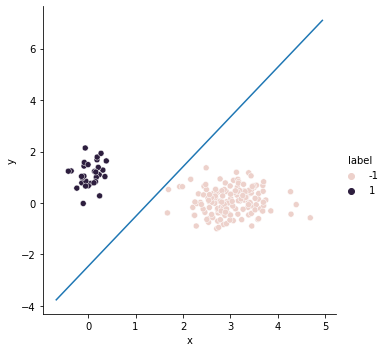

In [54]:
sns.relplot(x="x", y="y", hue="label", data=Data_set)
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')


slope = (-1)*(model.weights[0][0]/model.weights[0][1])

intercept = (-1)*(model.biases[0]/model.weights[0][1])

abline(slope,intercept)


In [55]:
np.unique(np.array(model.predict(Data_set)), return_counts=True)

(array([-1,  1]), array([150,  30]))

In [56]:
Prediction_Result = model.predict(Data_set)
True_Result = Data_set['label'].values
print(classification_report(True_Result, Prediction_Result, labels=[-1,1]))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        30

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

